# Plots for Comparison of Cov from Gamma and Cov from FFT

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from helpers_plot import initPlot, finalizePlot
from matplotlib import cm
from matplotlib.colors import LogNorm

In [16]:
initPlot(legendsize=18)

In [17]:
def get_bootstrap_error_cov(map3, B):
    Nthetas=map3.shape[0]
    Nrealisations=map3.shape[1]

    bootstrapCovs=np.zeros((B, Nthetas, Nthetas))

    for b in range(B):
        indices=np.random.randint(0, Nrealisations, Nrealisations)
        map3_tmp=map3[:,indices]
        bootstrapCovs[b]=np.cov(map3_tmp)

    return np.std(bootstrapCovs, axis=0)

## MS

In [18]:
ixs=[]
ix=0

for i in range(4):
    for j in range(4):
        for k in range(4):
            if(k>=j) & (j>=i):
                ixs.append(ix)
            ix+=1

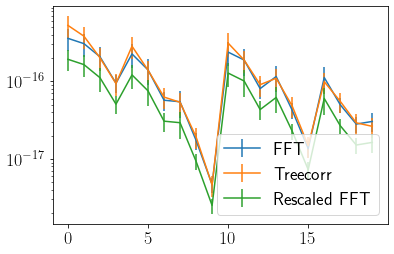

In [19]:
dir="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/"

map3_fft=np.loadtxt(dir+"map_cubed")
map3_treecorr=np.load(dir+"mapmapmap_from_treecorr_15_bins.npy")[:,:,:,0]

map3_treecorr=map3_treecorr.reshape(-1, 32).T
map3_treecorr=map3_treecorr[:,ixs]
cov_treecorr=np.cov(map3_treecorr.T)
cov_fft=np.cov(map3_fft.T)

err_treecorr=get_bootstrap_error_cov(map3_treecorr.T, 10000)
err_fft=get_bootstrap_error_cov(map3_fft.T, 10000)
A=np.deg2rad(2.93)**2
A_prime=np.deg2rad(4)**2


plt.yscale('log')
ix=2
plt.errorbar(range(20), (cov_fft[ix]), yerr=err_fft[ix], label='FFT')
plt.errorbar(np.arange(20),(cov_treecorr[ix]), yerr=err_treecorr[ix], label='Treecorr')
plt.errorbar(range(20),(cov_fft[ix])*A/A_prime, yerr=err_fft[ix]*A/A_prime, label='Rescaled FFT')
plt.legend()



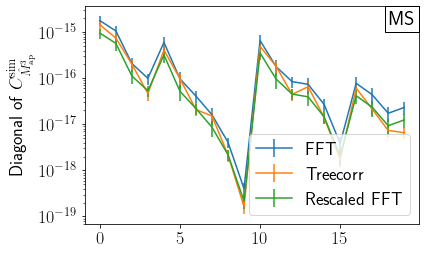

In [20]:
plt.yscale('log')

plt.errorbar(range(20), np.diag(cov_fft), yerr=np.diag(err_fft), label='FFT')
plt.errorbar(np.arange(20),np.diag(cov_treecorr), yerr=np.diag(err_treecorr), label='Treecorr')
plt.errorbar(range(20),np.diag(cov_fft)*A/A_prime, yerr=np.diag(err_fft)*A/A_prime, label='Rescaled FFT')
plt.text(19.7,3e-15, r"MS", bbox=dict(facecolor='white'), horizontalalignment='right', verticalalignment='top', size=20)
plt.ylabel(r'Diagonal of $C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}$')
plt.legend()

## SLICS (HOWLS)

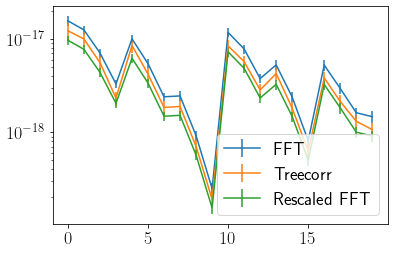

In [21]:
dir="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/"

map3_fft=np.loadtxt(dir+"map_cubed")
map3_treecorr=np.load(dir+"mapmapmap_from_treecorr_10_bins.npy")[:,:,:,0]

map3_treecorr=map3_treecorr.reshape(-1, 220).T
map3_treecorr=map3_treecorr[:,ixs]
cov_treecorr=np.cov(map3_treecorr.T)
cov_fft=np.cov(map3_fft.T)


err_treecorr=get_bootstrap_error_cov(map3_treecorr.T, 10000)
err_fft=get_bootstrap_error_cov(map3_fft.T, 10000)
A=np.deg2rad(7.87)**2
A_prime=np.deg2rad(10)**2


plt.yscale('log')
ix=5
plt.errorbar(range(20), (cov_fft[ix]), yerr=err_fft[ix], label='FFT')
plt.errorbar(np.arange(20),(cov_treecorr[ix]), yerr=err_treecorr[ix], label='Treecorr')
plt.errorbar(range(20),(cov_fft[ix])*A/A_prime, yerr=err_fft[ix]*A/A_prime, label='Rescaled FFT')
plt.legend()



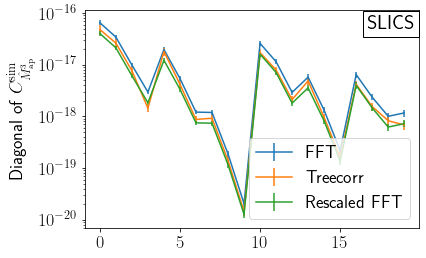

In [22]:
plt.yscale('log')

plt.errorbar(range(20), np.diag(cov_fft), yerr=np.diag(err_fft), label='FFT')
plt.errorbar(np.arange(20),np.diag(cov_treecorr), yerr=np.diag(err_treecorr), label='Treecorr')
plt.errorbar(range(20),np.diag(cov_fft)*A/A_prime, yerr=np.diag(err_fft)*A/A_prime, label='Rescaled FFT')
plt.text(19.7,9e-17, r"SLICS", bbox=dict(facecolor='white'), horizontalalignment='right', verticalalignment='top', size=20)
plt.ylabel(r'Diagonal of $C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}$')
plt.legend()

## SLICS 4-16 for Paper

In [23]:
# Load Data
dir_slics="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_theta_4_to_16/"

cov_T1inf=np.loadtxt(dir_slics+"cov_infinite_term1Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
cov_T2=np.loadtxt(dir_slics+"cov_square_term2Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")

cov_T4=np.loadtxt(dir_slics+"cov_infinite_term4Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
  

cov_T5=np.loadtxt(dir_slics+"cov_infinite_term5Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")


cov_T6=np.loadtxt(dir_slics+"cov_square_term6Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")


cov_T7=np.loadtxt(dir_slics+"cov_infinite_term7Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")

cov_ssc=np.loadtxt(dir_slics+"SSC_cov_square_term7Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")

map3=np.load(dir_slics+"map_cubed.npy")

cov_tot=cov_T1inf+cov_T2+cov_T4+cov_T5+cov_T6+cov_T7+cov_ssc
#cov_fft=np.cov(map3)
#err_fft=get_bootstrap_error_cov(map3, 10000)

cov_fft_paper=cov_fft[10:, 10:]
err_fft_paper=err_fft[10:, 10:]

cov_treecorr_paper=cov_treecorr[10:, 10:]
err_treecorr_paper=err_treecorr[10:, 10:]
cov_treecorr_paper.shape

(10, 10)

In [24]:
# Set Thetas labels
thetas_ind = np.array([[4, 4, 4], [4, 4, 8],
                       [4, 4, 16], [4, 8, 8], [4, 8, 16], [4,16,16],
                       [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16]])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas[0]}' {thetas[1]}' {thetas[2]}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

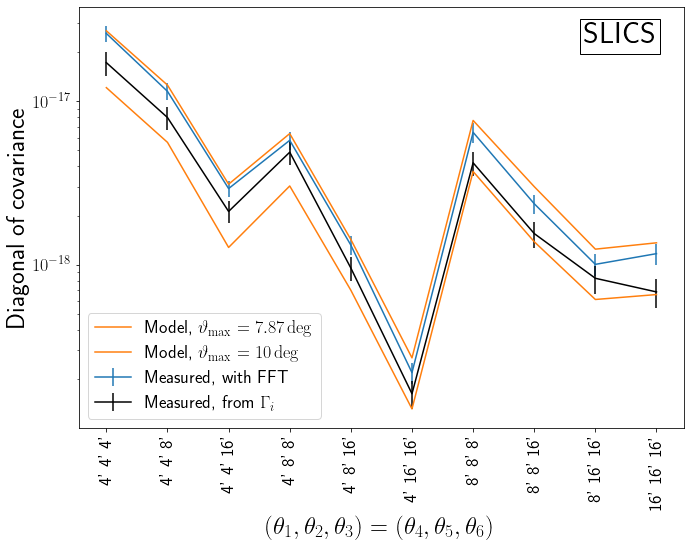

In [26]:
A=np.deg2rad(7.87)**2
A_prime=np.deg2rad(10)**2
fig, ax=plt.subplots(figsize=(10,8))

ax.set_yscale('log')

#ax.set_ylim(1e-20, 4e-17)
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels, rotation=90)

ax.errorbar(range(10), np.diag(cov_fft_paper), yerr=np.diag(err_fft_paper), label=r'Measured, with FFT', color='C0')
ax.errorbar(np.arange(10),np.diag(cov_treecorr_paper), yerr=np.diag(err_treecorr_paper), label=r'Measured, from $\Gamma_i$', color='xkcd:black')
#ax.errorbar(range(10),np.diag(cov_fft_paper)*A/A_prime, yerr=np.diag(err_fft_paper)*A/A_prime, label='Rescaled FFT', color='C0')
ax.plot(np.diag(cov_tot), label=r'Model, $\vartheta_\mathrm{max}=7.87\,\mathrm{deg}$', color='C1')
ax.plot(np.diag(cov_tot-cov_ssc-cov_T2-cov_T6-cov_T5)*A/A_prime, label=r'Model, $\vartheta_\mathrm{max}=10\,\mathrm{deg}$', color='C1')

ax.text(9,3e-17, r"SLICS", bbox=dict(facecolor='white'), horizontalalignment='right', verticalalignment='top', size=30)
ax.set_ylabel("Diagonal of covariance", size=25)
ax.set_xlabel(r'$(\theta_1, \theta_2, \theta_3)=(\theta_4, \theta_5, \theta_6)$', size=25)
finalizePlot(ax, outputFn=dir_slics+"/ComparisonSLICS_corrfunc_fft.png", showlegend=True, loc_legend='lower left')
